b) Implement the linear regression using Gradient Descent method in your own code. Also implement the linear regression by using existing library (scikit-learn). Compare the performance of both implementations.

##### Manual Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing, svm, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

# Function for Linear Regression using Gradient Descent
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
    m, c = 0, 0                                            # Initialize Parameters
    for _ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # Random Sample
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        f = ys - (m*Xs + c)
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        c -= lr * (-2 * f.sum() / N)
    return m, c

# Input: Dataset 
data = pd.read_csv('sgdregress.csv')

# Taking only two attributes of the Dataset
data_binary = data[['C1','C2']]

# Eliminating NaN or missing input numbers 
data_binary.fillna(method ='ffill', inplace = True) 

# Dropping any rows with Nan values 
data_binary.dropna(inplace = True) 

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
X = np.array(data_binary['C1']).reshape(-1, 1) 
Y = np.array(data_binary['C2']).reshape(-1, 1)

# Dividing into test and training sets 
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3)

# Total number of Test values
n = len(Y_test)

# Mean X and Y
mean_x_train = np.mean(X_train)
mean_y_train = np.mean(Y_train)
mean_x_test = np.mean(X_test)
mean_y_test = np.mean(Y_test)

# Training the Regression Model over Training Set
m, c = SGD(X_train, Y_train, lr=0.0001, epoch=1000, batch_size=2)

# Testing of Regression Model over Testing Set
Y_pred = m*X_test + c

# Calculating Root Mean Squares Error & R2 Score
rmse = 0
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X_test[i]
    rmse += (Y_test[i] - y_pred) ** 2
    ss_tot += (Y_test[i] - mean_y_test) ** 2
    ss_res += (Y_test[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)
r2 = 1 - (ss_res/ss_tot)

##### (SciKit-Learn) Method.

In [2]:
# Create Linear Regression object
clf = SGDRegressor(max_iter=10000, learning_rate='constant',eta0=0.0001)

# Train the model
clf.fit(X_train,Y_train)

# Make predictions 
Y_predict= clf.predict(X_test)

##### Output and Comparison of Both Methods.

FOR LINEAR REGRESSION USING GRADIENT DESCENT METHOD MANUALLY 



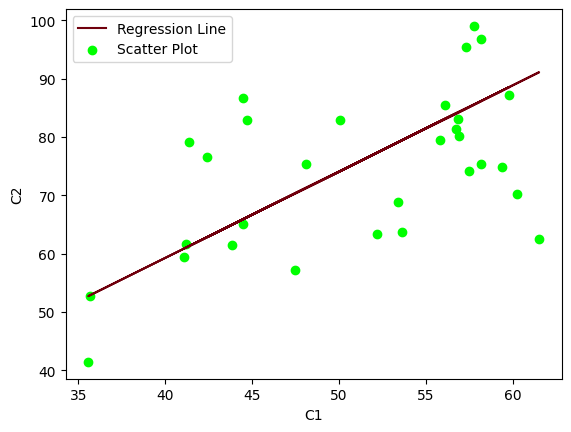


Coefficients: m =  1.4796655176468976  ; c =  0.06449702408542972

RMSE: 11.8472

R2 Score: 0.2007
_______________________________________________________________________


FOR LINEAR REGRESSION USING GRADIENT DESCENT METHOD WITH SCIKIT-LEARN



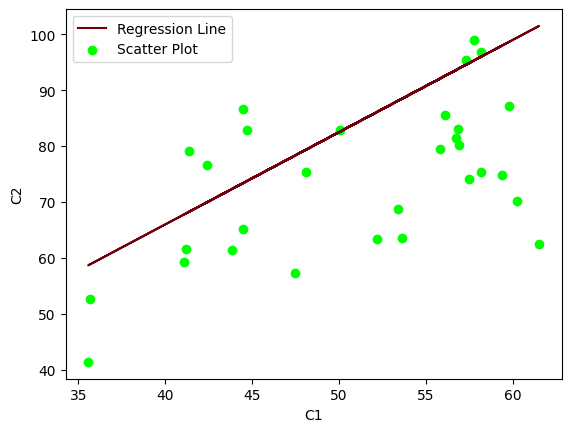


Coefficients: m =  [1.64865489]  ; c =  [0.04304978]

RMSE: 15.8981

R2 Score: -0.4393


In [3]:
# For Manual Method
# Plotting Line and Scatter Points
plt.plot(X_test, Y_pred, color='#70000d', label='Regression Line')
plt.scatter(X_test, Y_test, c='#00ff00', label='Scatter Plot')
plt.xlabel('C1')
plt.ylabel('C2')
plt.legend()
# Output: The Plot for Regression Line, Coefficients, RMSE and the R2 Score
print("FOR LINEAR REGRESSION USING GRADIENT DESCENT METHOD MANUALLY \n")
plt.show()
print("\nCoefficients: m = ",m," ; c = ", c)
print('\nRMSE: %.4f' %rmse)
print('\nR2 Score: %.4f' %r2)

# For SciKit-Learn Method
# Plotting Line and Scatter Points
plt.plot(X_test, Y_predict, color='#70000d', label='Regression Line')
plt.scatter(X_test, Y_test, c='#00ff00', label='Scatter Plot')
plt.xlabel('C1')
plt.ylabel('C2')
plt.legend()
# Output: The Plot for Regression Line, Coefficients, RMSE and the R2 Score.
print("_______________________________________________________________________\n")
print("\nFOR LINEAR REGRESSION USING GRADIENT DESCENT METHOD WITH SCIKIT-LEARN\n")
plt.show()
print("\nCoefficients: m = ",clf.coef_," ; c = ", clf.intercept_)
print("\nRMSE: %.4f" % mean_squared_error(Y_test, Y_predict, squared = False))
print('\nR2 Score: %.4f' % r2_score(Y_test, Y_predict))


##### On comparison, we can see that both the methods (viz. Gradient Descent Method Manually and Gradient Descent Method with SciKit-Learn) return approximately same value of Root Mean Square Error and R2 Score with a slight difference between the Coefficients calculated. 

##### Also, on comparing the R2 Scores of both methods, it can be seen that the Model created by Manual Method fits more as compared to Model created by SciKit-Learn Method.